In [2]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three

warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [3]:
# plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])
# def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation):
#     # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
#     # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
#     gamma = iteration_gamma
#     gamma = -gamma  # caused by tradition.
#     # convert gamma to gamma used by simulation
#     with open(gamma_for_simulation, "w") as out:
#         c = 0
#         for i in range(20):
#             for j in range(i, 20):
#                 out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
#                 c += 1
#         out.write("\n")
#         for i in range(20):
#             for j in range(i, 20):
#                 # protein, water
#                 out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
#                 c += 1

res_type_map = {
    'A': 0,
    'C': 4,
    'D': 3,
    'E': 6,
    'F': 13,
    'G': 7,
    'H': 8,
    'I': 9,
    'K': 11,
    'L': 10,
    'M': 12,
    'N': 2,
    'P': 14,
    'Q': 5,
    'R': 1,
    'S': 15,
    'T': 16,
    'V': 19,
    'W': 17,
    'Y': 18
}
# res_type_map = gamma_se_map_1_letter = {   'A': 0,  'R': 1,  'N': 2,  'D': 3,  'C': 4,
#                             'Q': 5,  'E': 6,  'G': 7,  'H': 8,  'I': 9,
#                             'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14,
#                             'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                        'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))

def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation, burial_gamma_for_simulation=None):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = iteration_gamma
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1
    if burial_gamma_for_simulation:
        rhoGamma = pd.DataFrame(gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
        rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
        rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
        rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
        g = rhoGamma[["rho1", "rho2", "rho3"]].values
        np.savetxt(burial_gamma_for_simulation, g, fmt='%7.4f')



# with burial

In [73]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
pre = "/Users/weilu/Research/server/april_2019/optimization_test/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


pre = "/Users/weilu/Research/server/april_2019/"
location = pre + "phis/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_summary.txt"
A_prime = np.loadtxt(location)





In [34]:
A_prime.shape

(690,)

In [74]:
B_inverse = np.linalg.pinv(B)

In [75]:
up = A.dot(B_inverse).dot(A) - A_prime.dot(B_inverse).dot(A)
down = A.dot(B_inverse).dot(A_prime) - A_prime.dot(B_inverse).dot(A_prime)
lambda_1 = up / down

In [76]:
up

5.051516017418994

In [77]:
down

-3499.9666820036396

In [78]:
lambda_1

-0.0014433040301192618

In [79]:
g = B_inverse.dot(A - A_prime*lambda_1)

In [96]:
np.mean(g)

0.06050412205310636

In [100]:
np.std(g)

0.7123715906451454

In [97]:
g1 = B_inverse.dot(A)

In [98]:
np.mean(g1)

0.05483645057684526

In [99]:
np.std(g1)

0.7116097967447709

In [80]:
g.dot(A)

16.257922504420286

In [88]:
g.dot(A_prime)

16.2579225044202

In [101]:
g1.dot(A)

16.24177156349257

In [102]:
g1.dot(A_prime)

11.190255546073505

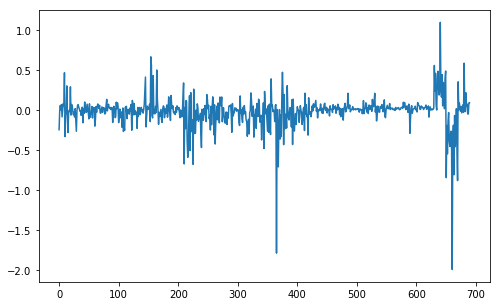

In [41]:
plt.plot(A)

In [94]:
np.sum(abs(lambda_1*A_prime))

0.3914945872362957

In [95]:
np.sum(abs(A))

73.01364000000001

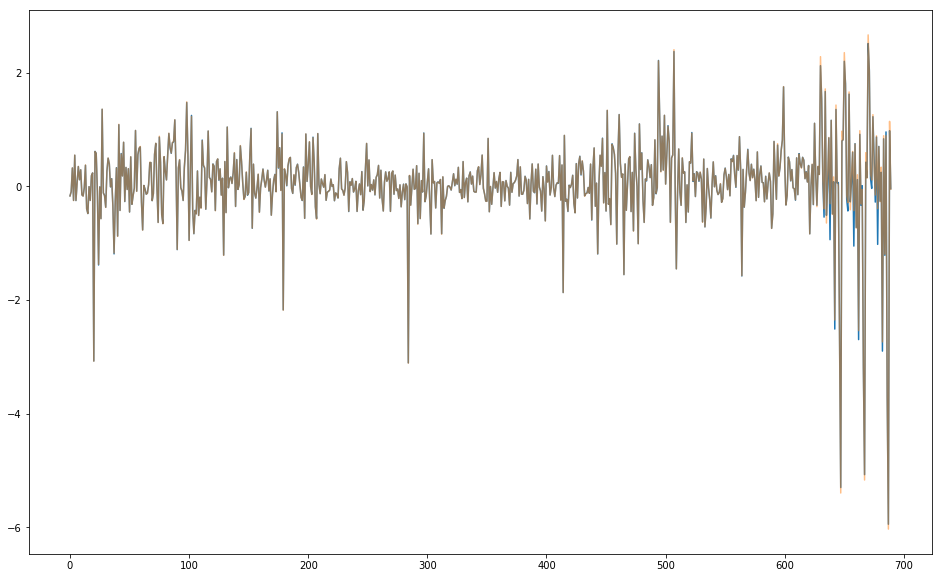

In [111]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])
plt.plot(g1)
plt.plot(g, alpha=0.5)

# plt.yscale("log")

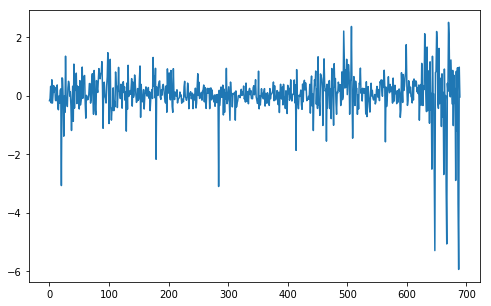

In [105]:
plt.plot(g1)

No handles with labels found to put in legend.


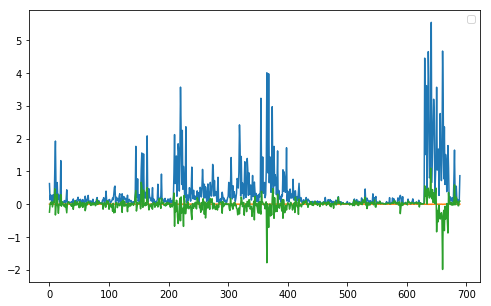

In [103]:
plt.plot(A_prime)
plt.plot(lambda_1*A_prime)
plt.plot(A)

# plt.yscale("log")

In [16]:
c = A0
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),
              options={"disp": True})



print(res)

Optimization terminated successfully.
         Current function value: -22.000000  
         Iterations: 5
     con: array([], dtype=float64)
     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.90000000e+01, 1.77635684e-15])
  status: 0
 success: True
       x: array([10., -3.])


In [13]:
test = np.dot(np.linalg.pinv(B), A)

In [14]:
test[:10]

array([-0.1696517 , -0.09684112,  0.32163425, -0.24861446,  0.54592761,
       -0.25149968,  0.06390231,  0.34662149,  0.11408598,  0.28950261])

In [15]:
Gamma[:10]

array([-0.16938, -0.09585,  0.32145, -0.24856,  0.5464 , -0.25204,
        0.06395,  0.34685,  0.11461,  0.28942])

In [10]:
total_phis = 690
num_decoys = 15000
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, mode=2)


654


In [11]:
Gamma_filtered[:10]

array([-0.16178+0.j, -0.08368+0.j,  0.31874+0.j, -0.24923+0.j,
        0.51143+0.j, -0.2453 +0.j,  0.06829+0.j,  0.34626+0.j,
        0.13185+0.j,  0.29272+0.j])

In [12]:
filtered_gamma[:10]

array([-0.16204062, -0.10045653,  0.32024084, -0.24975294,  0.52752271,
       -0.24230321,  0.06673051,  0.34728753,  0.12864665,  0.28935561])

In [80]:
Gamma[:10]

array([-0.36672,  0.08898, -0.00318,  0.33267, -1.4817 ,  0.13133,
        0.40348, -0.14097, -0.20817, -2.20075])

In [79]:
Gamma[630:]

array([-0.14009, -0.25496, -0.25682, -0.27643,  0.17467, -0.28242,
       -0.31422, -0.13472, -0.17776,  0.18318,  0.04142, -0.26107,
       -0.17891,  0.06365, -0.17609, -0.22773, -0.0658 , -0.18529,
       -0.04176,  0.23534,  0.09679, -0.49751, -0.46232, -0.77906,
        1.26307, -0.61399, -0.86138, -0.2185 , -0.18548,  1.29716,
        0.71169, -0.73069,  0.24583,  0.64734, -0.26806, -0.35472,
        0.12022,  0.19507,  0.42189,  1.43618,  0.55265, -0.9863 ,
       -0.87701, -1.7389 ,  3.17942, -1.26118, -1.9753 , -0.30654,
       -0.18941,  3.40786,  2.03997, -1.70513,  1.08636,  1.77866,
       -0.42379, -0.57809,  0.4644 ,  0.9425 ,  1.34357,  3.72756])

In [101]:
burialOnly = np.loadtxt("/Users/weilu/Research/server/feb_2019/optimization_debug_only_burial/gammas/cath-dataset-nonredundant-S20Clean_phi_burial_well4.0_gamma")



In [112]:
# now, positive means favored.
rhoGamma = pd.DataFrame(-burialOnly.reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/burial_only_gamma.dat", g, fmt='%7.4f')
# rhoGamma
rhoGamma["hydrophobicityOrder"] = rhoGamma["oneLetter"].apply(lambda x: hydrophobicity_map[x])
rhoGamma.sort_values("hydrophobicityOrder")

,Residue,rho1,rho2,rho3,index,oneLetter,hydrophobicityOrder
1,ARG,1.68010,1.69144,1.18949,1,R,0
11,LYS,0.96183,0.58746,0.13187,11,K,1
2,ASN,0.42031,0.32944,0.30461,2,N,2
5,GLN,1.41756,1.35558,1.02570,5,Q,3
3,ASP,0.64722,0.28147,0.05978,3,D,4
6,GLU,1.11516,0.71254,0.37777,6,E,5
8,HIS,1.10384,1.26635,0.96425,8,H,6
18,TYR,1.79590,2.60115,2.43177,18,Y,7
17,TRP,1.88372,2.69206,2.37320,17,W,8
15,SER,1.06307,0.99539,1.08353,15,S,9


In [106]:
hydrophobicity_letters = ['R', 'K', 'N', 'Q', 'D', 'E', 'H', 'Y',
                          'W', 'S', 'T', 'G', 'P', 'A', 'M', 'C', 'F', 'L', 'V', 'I']

hydrophobicity_map = dict(list(zip(hydrophobicity_letters, list(range(20)))))

In [121]:
location = "/Users/weilu/Research/database/queriedPDB.dat"
with open(location) as f:
    n = int(next(f))
    print(n)
    all_lines = f.read().splitlines()
    first_20 = all_lines[:20]
    print(first_20)

456
['1A2J', '1A3H', '1A5Y', '1A8Q', '1AGY', '1AK1', '1AKZ', '1AOV', '1ARL', '1AUZ', '1B1A', '1B31', '1B7U', '1B8X', '1BCO', '1BEE', '1BGT', '1BN6', '1BOH', '1BOI']


In [102]:
burialOnly.shape

(60,)

In [ ]:
Gamma = np.loadtxt(pre+Gamma_name)

In [94]:
rho_table = [[0.0, 3.0], [3.0, 6.0], [6.0, 9.0]]
for i in range(3):
    print(rho_table[i][0], rho_table[i][1])

0.0 3.0
3.0 6.0
6.0 9.0


In [97]:
Gamma.shape

(690,)

In [89]:
rhoGamma = pd.DataFrame(Gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')

In [90]:
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-0.14009,0.09679,0.55265,0,A
1,ARG,-0.25496,-0.49751,-0.98630,1,R
2,ASN,-0.25682,-0.46232,-0.87701,2,N
3,ASP,-0.27643,-0.77906,-1.73890,3,D
4,CYS,0.17467,1.26307,3.17942,4,C
5,GLN,-0.28242,-0.61399,-1.26118,5,Q
6,GLU,-0.31422,-0.86138,-1.97530,6,E
7,GLY,-0.13472,-0.21850,-0.30654,7,G
8,HIS,-0.17776,-0.18548,-0.18941,8,H
9,ILE,0.18318,1.29716,3.40786,9,I


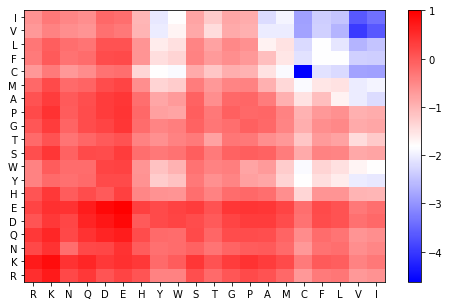

In [91]:
plot_contact_well(Gamma[:210], inferBound=True, invert_sign=False)

In [99]:
gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization/iteration_gamma.dat"
burial_gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization/iteration_burial_gamma.dat"
gamma_format_convertion_iteration_to_simulation(Gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)




In [12]:
pre = "/Users/weilu/Research/server/feb_2019/jan_optimization/gammas/"
pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
Gamma_name = pp + "_gamma"
withoutBurialGamma = np.loadtxt(pre+Gamma_name)

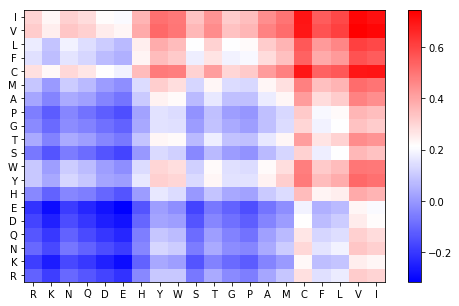

In [84]:
plot_contact_well((-Gamma[:210]) - (-withoutBurialGamma[:210]), inferBound=True, invert_sign=False)

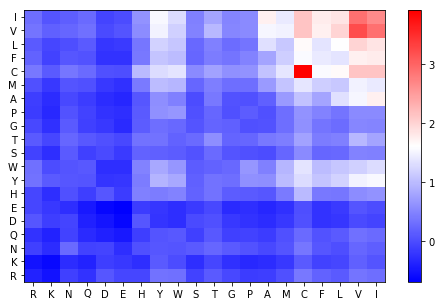

In [14]:
plot_contact_well(withoutBurialGamma[:210], inferBound=True)

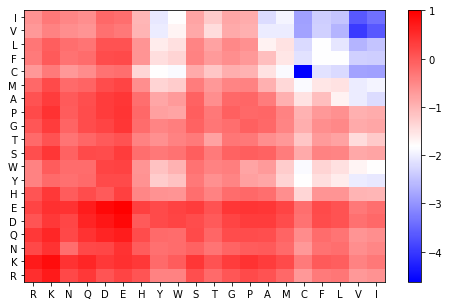

In [85]:
plot_contact_well(Gamma[:210], inferBound=True, invert_sign=False)

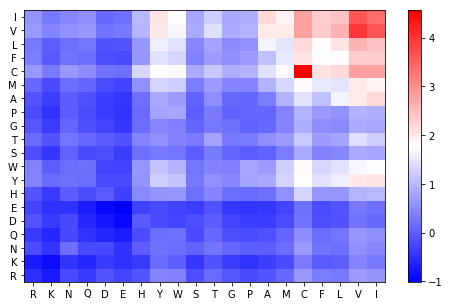

In [67]:
plot_contact_well(Gamma_filtered[:210], inferBound=True)

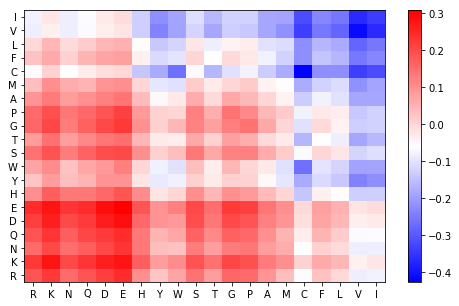

In [8]:
plot_contact_well(Gamma[210:420], inferBound=True)

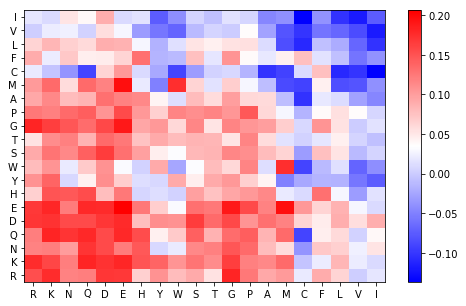

In [21]:
plot_contact_well(Gamma[420:630], inferBound=True)

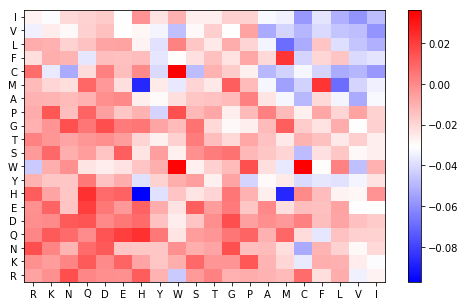

In [19]:
plot_contact_well(withoutBurialGamma[210:420] - Gamma[210:420], inferBound=True)

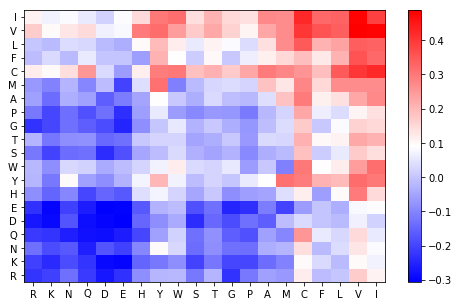

In [20]:
plot_contact_well(withoutBurialGamma[420:630] - Gamma[420:630], inferBound=True)

# without burial

In [35]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/back_up_gammas/"
A_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_A"
B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B"
B_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B_filtered"
P_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_P"
Gamma_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
Gamma_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
Lamb_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb"
Lamb_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)





In [57]:
pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
A_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_A"
B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B"
B_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B_filtered"
P_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_P"
Gamma_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
Gamma_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
Lamb_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb"
Lamb_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})



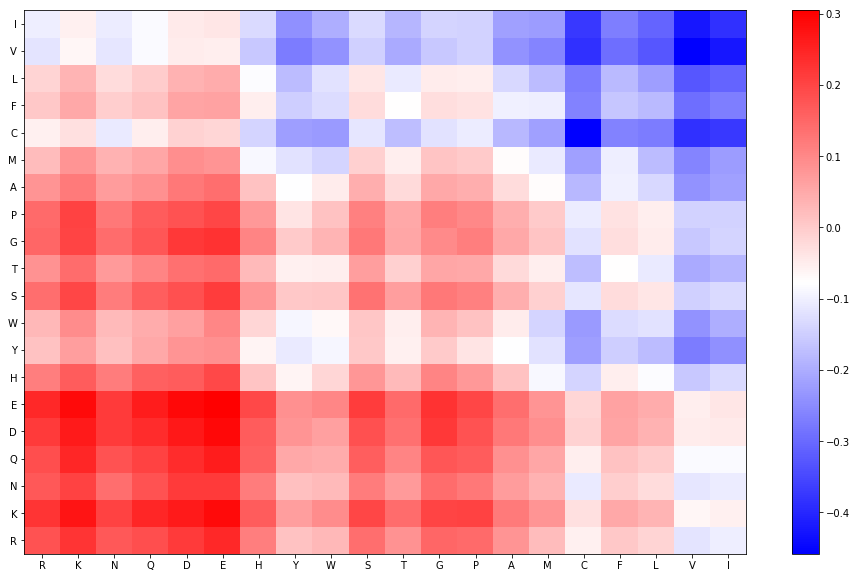

In [84]:
plot_contact_well(Gamma[210:420], inferBound=True)

In [63]:
gamma_for_simulation = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/iteration_gamma.dat"
burial_gamma_for_simulation = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/iteration_burial_gamma.dat"
gamma_format_convertion_iteration_to_simulation(Gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server_backup/feb_2019/jan_optimization/iteration_gamma.dat'

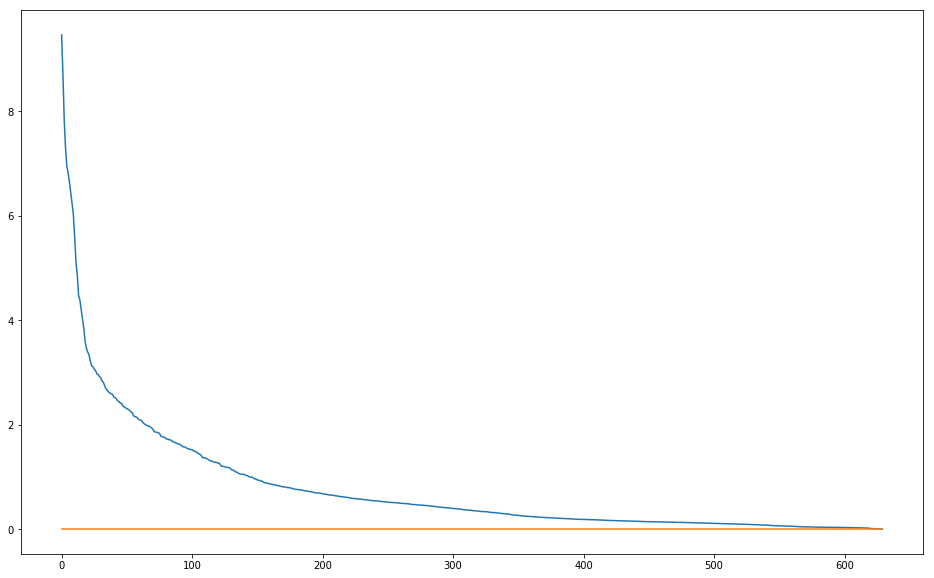

In [59]:
plt.plot(Lamb)
plt.plot(Lamb_filtered)

In [27]:

def get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, noise_iterations=10, relative_error_threshold=0.5):
    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

    cutoff_modes = []
    for i_noise in range(noise_iterations):
        noisy_B = np.zeros((total_phis, total_phis))
        for i in range(total_phis):
            for j in range(i, total_phis):
                random_B_ij = np.random.normal(
                    loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
                noisy_B[i][j] = noisy_B[j][i] = random_B_ij - \
                    other_half_B[i][j]

        noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
        noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
            noisy_lamb, noisy_P)

        try:
            cutoff_mode = np.where(
                np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
        except IndexError:
            cutoff_mode = len(lamb)
        cutoff_modes.append(cutoff_mode)

    cutoff_mode = min(cutoff_modes)
    print(cutoff_mode)

    filtered_lamb = np.copy(lamb)
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
        filtered_lamb, cutoff_mode, P)

    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)
    return filtered_gamma, filtered_B, filtered_lamb, P, lamb
def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors




In [61]:
total_phis = 630
num_decoys = 1000
noise_iterations=10
relative_error_threshold=0.5


lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

cutoff_modes = []
for i_noise in range(noise_iterations):
    noisy_B = np.zeros((total_phis, total_phis))
    for i in range(total_phis):
        for j in range(i, total_phis):
#             random_B_ij = np.random.normal(
#                 loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
            random_B_ij = np.random.normal(
                loc=half_B[i][j], scale=std_half_B[i][j])
            noisy_B[i][j] = noisy_B[j][i] = random_B_ij - other_half_B[i][j]

    noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
    noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
        noisy_lamb, noisy_P)

    try:
        cutoff_mode = np.where(
            np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
    except IndexError:
        cutoff_mode = len(lamb)
    cutoff_modes.append(cutoff_mode)

cutoff_mode = min(cutoff_modes)
print(cutoff_mode)

filtered_lamb = np.copy(lamb)
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
    filtered_lamb, cutoff_mode, P)

filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
# return filtered_gamma, filtered_B, filtered_lamb, P, lamb

0


In [78]:
x = np.zeros(10000)
for i in range(10):
    x1 = np.random.normal(10, scale=10, size=10000)
    x += x1
x = x/10

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   3.,   1.,   2.,   5.,   9.,   9.,   8.,   9.,
         18.,  15.,  16.,  19.,  20.,  40.,  25.,  35.,  45.,  59.,  92.,
         82.,  82., 106.,  98., 135., 144., 172., 174., 215., 219., 226.,
        222., 272., 280., 297., 290., 322., 318., 322., 329., 302., 312.,
        323., 316., 294., 280., 310., 297., 264., 262., 235., 220., 232.,
        199., 163., 159., 152., 135., 127.,  96.,  87.,  79.,  67.,  66.,
         55.,  41.,  34.,  29.,  23.,  16.,  21.,  15.,  20.,   2.,   8.,
          7.,   5.,   1.,   4.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([-3.95227878, -3.69337766, -3.43447654, -3.17557543, -2.91667431,
        -2.65777319, -2.39887208, -2.13997096, -1.88106984, -1.62216873,
        -1.36326761, -1.10436649, -0.84546538, -0.58656426, -0.32766314,
        -0.06876203,  0.19013909,  0.44904021,  0.70794132,  0.96684244,
         1.22574356,  1.48

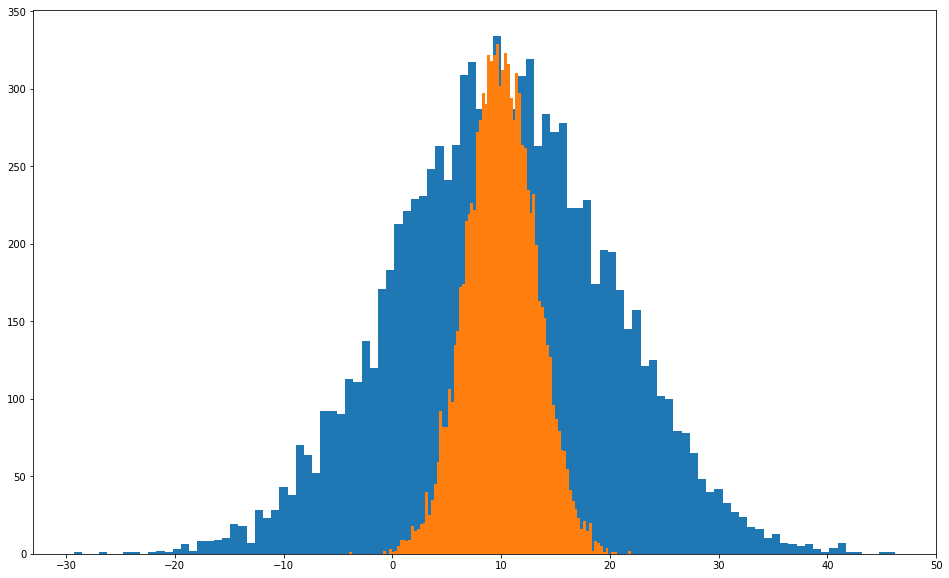

In [82]:
plt.hist(x1, bins=100)
plt.hist(x, bins=100)

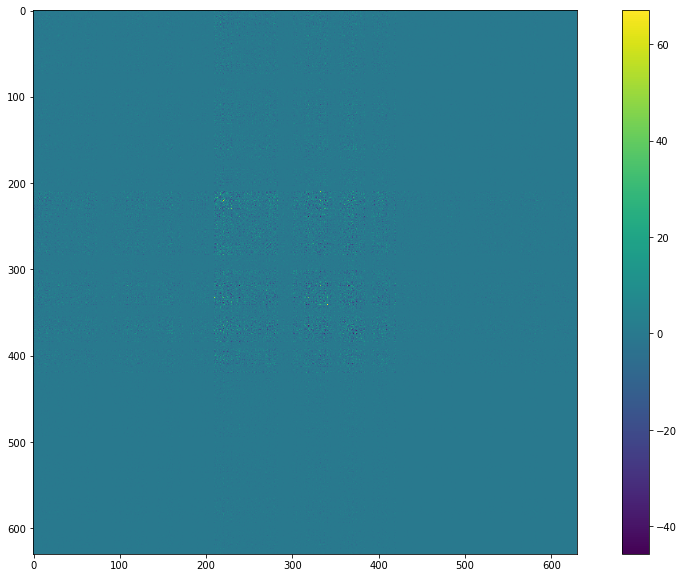

In [70]:
plt.imshow(noisy_B)
plt.colorbar()

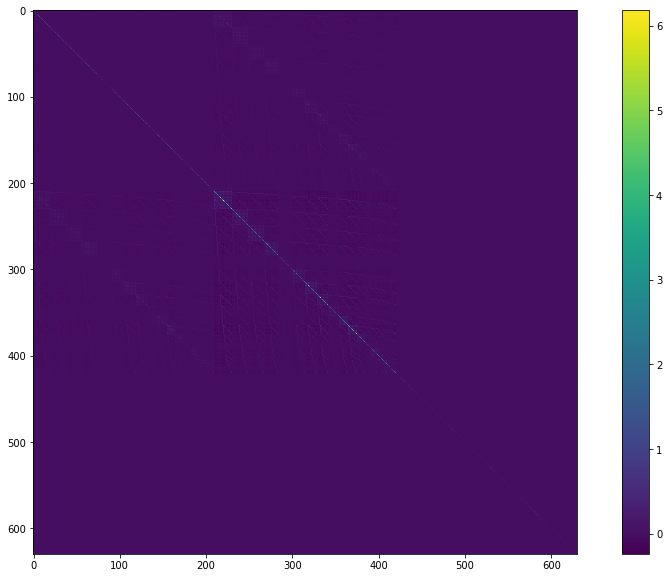

In [71]:
plt.imshow(B)
plt.colorbar()

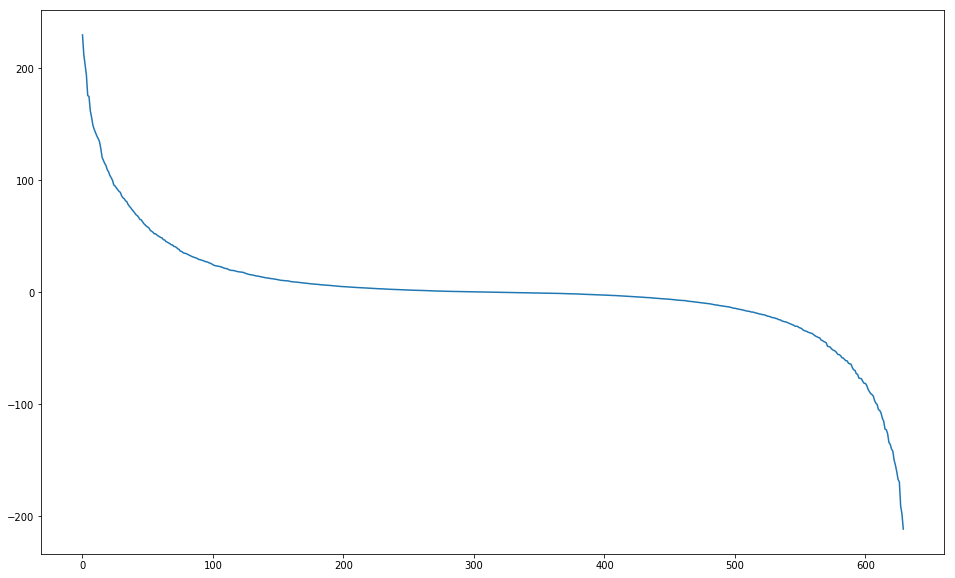

In [67]:
plt.plot(noisy_lamb)

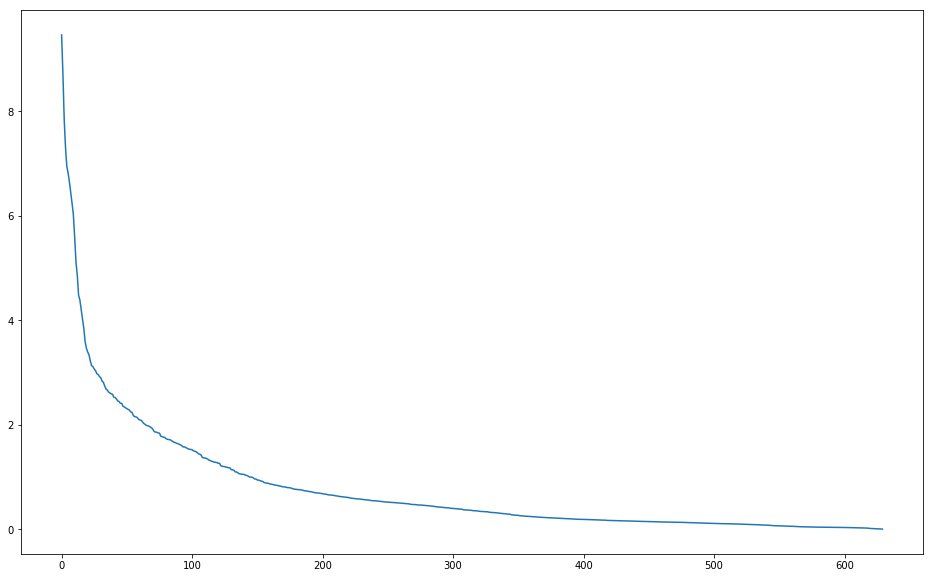

In [68]:
plt.plot(lamb)

In [49]:
np.std([1,2,3])

0.816496580927726

In [52]:
x = np.array([1,2,3])
np.sqrt(np.mean(abs(x - x.mean())**2))

0.816496580927726

In [53]:
np.mean(abs(x - x.mean())**2)

0.6666666666666666

In [ ]:
np.std()

In [48]:
np.abs(lamb - noisy_lamb) / lamb

array([4.42362404e-03, 1.93893429e-03, 2.64110767e-03, 1.42428813e-03,
       1.50997454e-03, 2.87469480e-03, 2.46747095e-03, 6.72837058e-04,
       4.61360827e-03, 4.42200233e-04, 1.75412824e-04, 3.93785708e-05,
       1.31943593e-04, 7.79426405e-04, 1.51753926e-02, 9.32879407e-04,
       1.52171863e-02, 3.85908448e-03, 1.80824521e-03, 7.61036944e-03,
       1.50037002e-03, 5.59814416e-03, 5.66798828e-04, 5.91414606e-03,
       1.44194857e-03, 2.68685516e-04, 7.05757823e-03, 2.02485028e-03,
       2.78607884e-03, 5.84702011e-03, 8.21529995e-03, 2.75890912e-03,
       1.60692462e-03, 2.86493136e-03, 3.02323239e-03, 6.98463693e-03,
       4.19093134e-03, 7.71313831e-03, 5.09829324e-04, 4.21634388e-03,
       8.68223284e-03, 5.27529835e-03, 6.44646008e-03, 7.12112177e-03,
       6.70522986e-03, 7.12967458e-04, 2.57357373e-03, 5.14090074e-03,
       5.35104515e-03, 7.94396756e-03, 2.15530435e-03, 3.12668421e-03,
       4.02619438e-04, 3.29334879e-03, 3.70430819e-03, 6.91930688e-03,
      

In [47]:
np.where(np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)

(array([], dtype=int64),)

In [37]:
np.sum(filtered_B-B_filtered)

(1.0000000248911933e-05+0j)

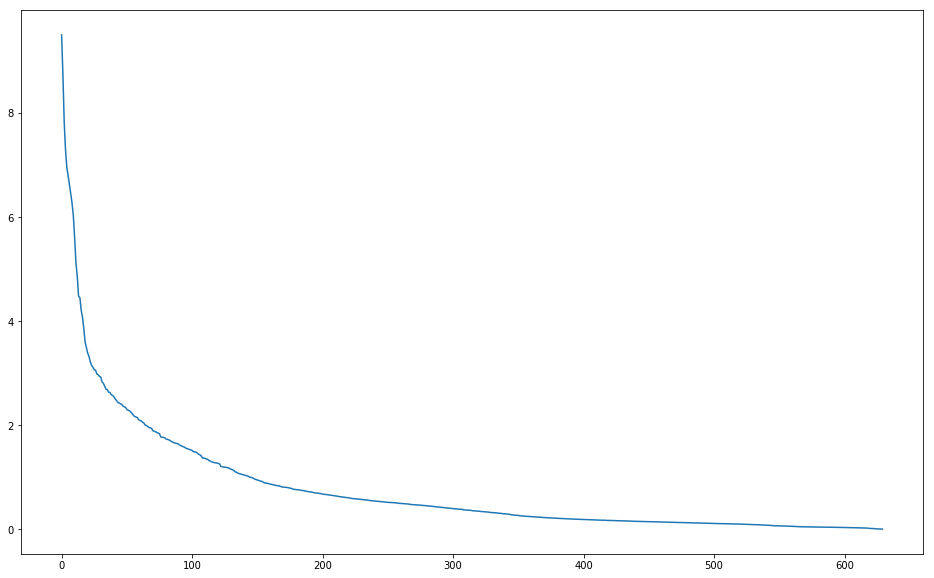

In [45]:
plt.plot(noisy_lamb)

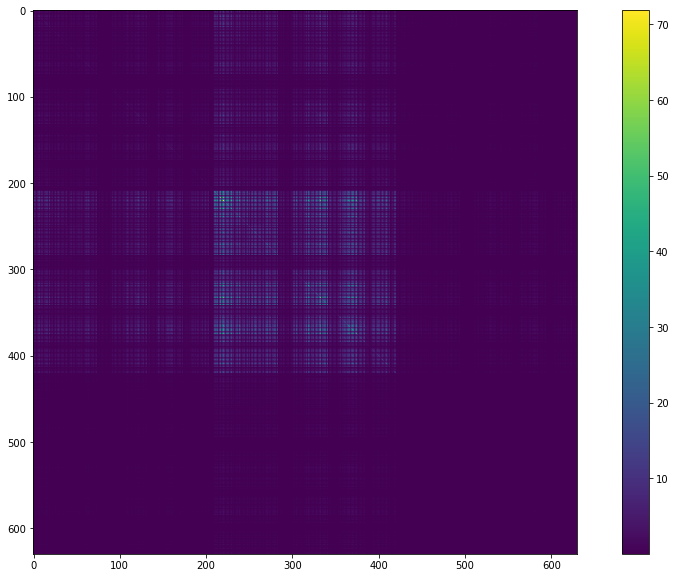

In [43]:
plt.imshow(half_B)
plt.colorbar()

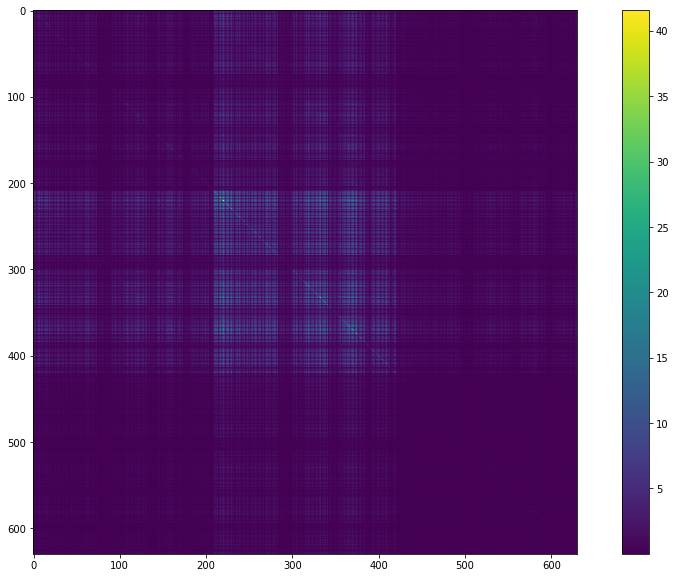

In [42]:
plt.imshow(std_half_B)
plt.colorbar()

In [22]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

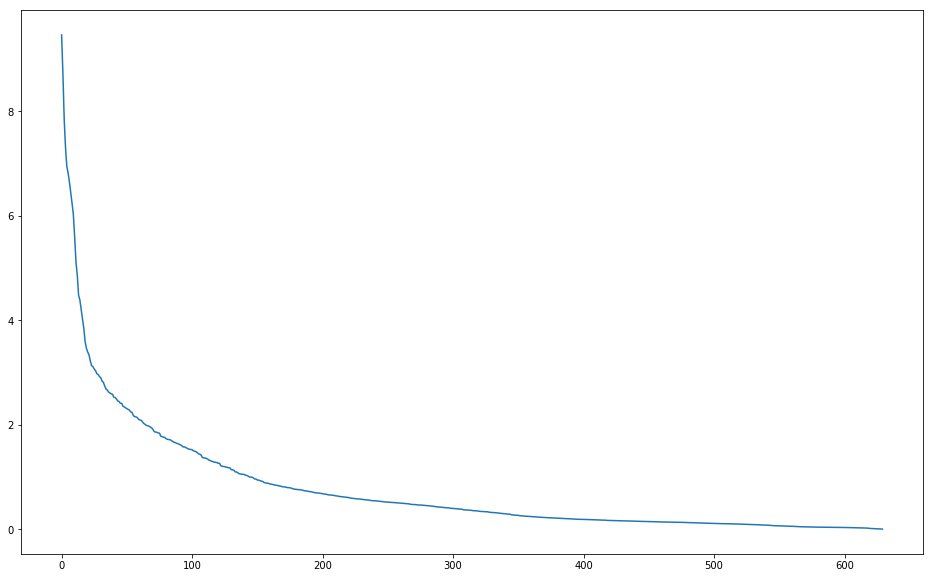

In [28]:
plt.plot(lamb)

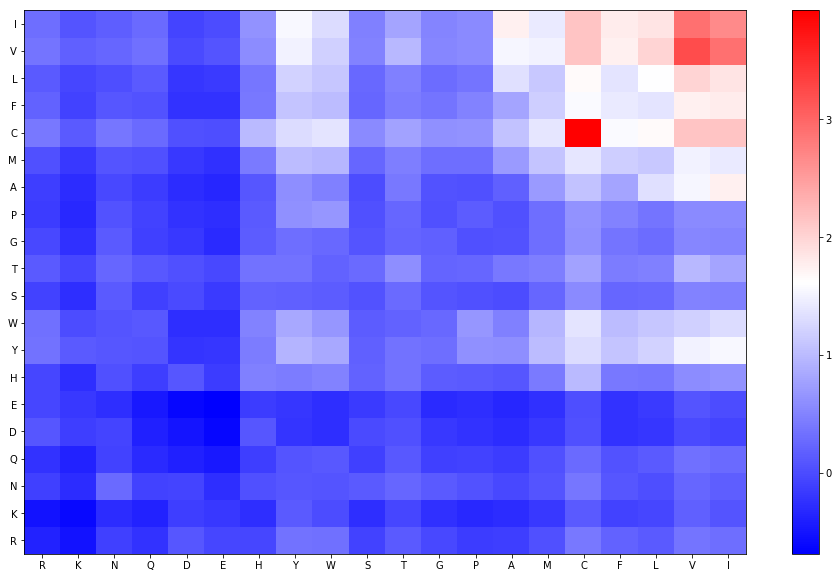

In [54]:
plot_contact_well(Gamma[:210], inferBound=True)

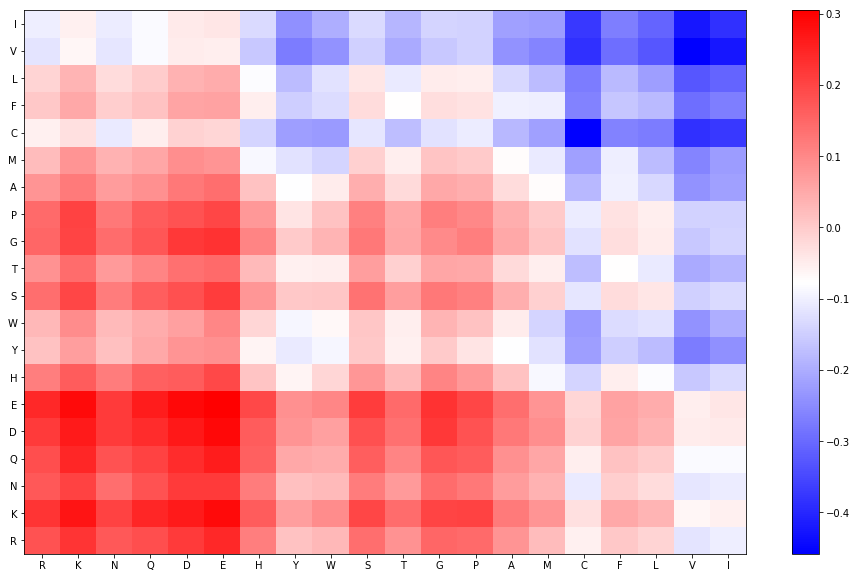

In [55]:
plot_contact_well(Gamma[210:420], inferBound=True)

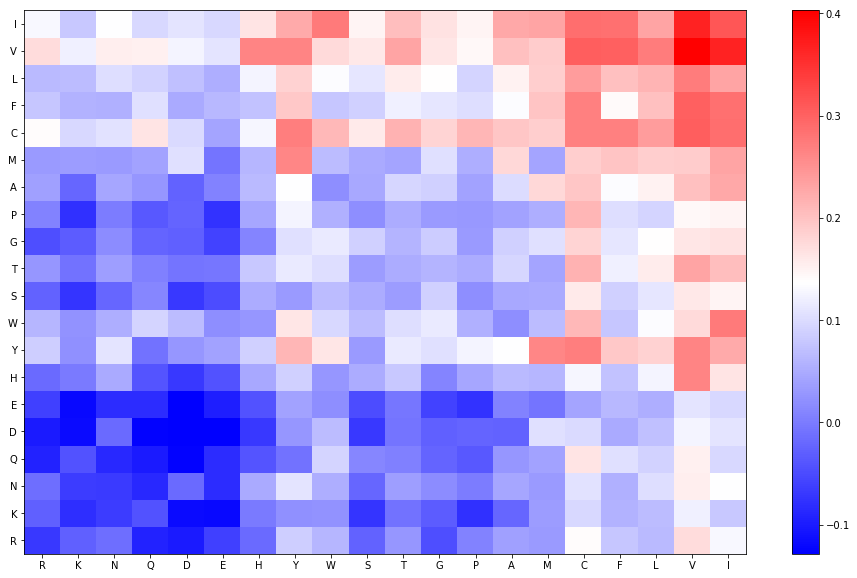

In [56]:
plot_contact_well(Gamma[420:], inferBound=True)

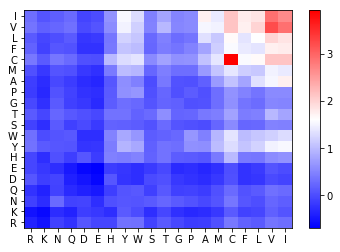

In [5]:
plot_contact_well(Gamma_filtered[:210], inferBound=True)

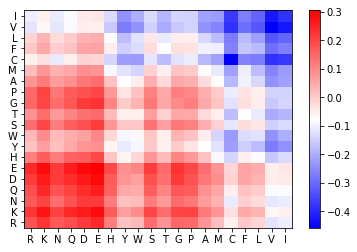

In [6]:
plot_contact_well(Gamma[210:420], inferBound=True)

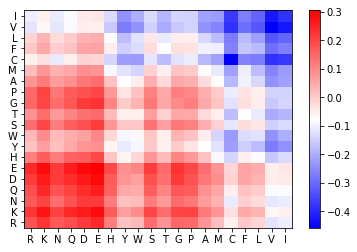

In [7]:
plot_contact_well(Gamma_filtered[210:420], inferBound=True)

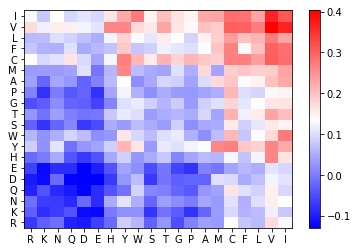

In [8]:
plot_contact_well(Gamma[420:], inferBound=True)

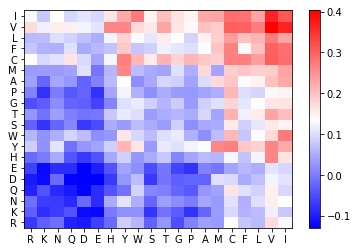

In [9]:
plot_contact_well(Gamma_filtered[420:], inferBound=True)

In [10]:
np.sum(Gamma - Gamma_filtered)

0j

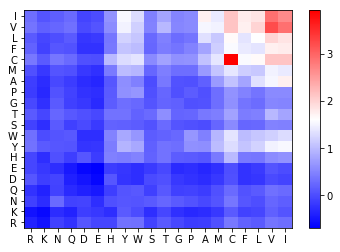

In [17]:
plot_contact_well(Gamma[:210], inferBound=True)

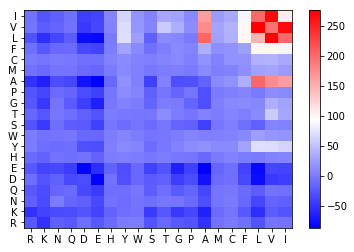

In [18]:
plot_contact_well(Gamma_filtered[:210], inferBound=True)

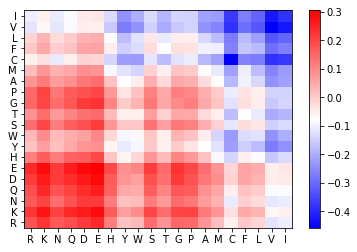

In [19]:
plot_contact_well(Gamma[210:420], inferBound=True)

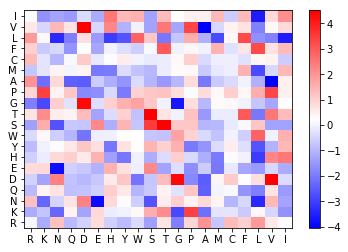

In [20]:
plot_contact_well(Gamma_filtered[210:420], inferBound=True)

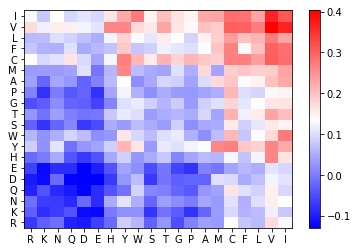

In [16]:
plot_contact_well(Gamma[420:], inferBound=True)

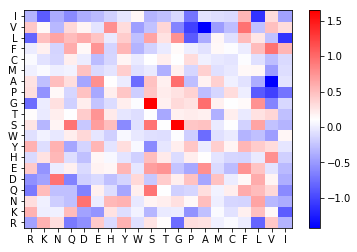

In [15]:
plot_contact_well(Gamma_filtered[420:], inferBound=True)